In [173]:
#  READ THE FILE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dfluggage = pd.read_excel(r'E:/Neural Lab/SATS/Flight_Baggage_Ulddetails_Jan2023.xlsx',parse_dates=['flightNumber','Pick_up_Time'])

In [174]:
dfluggage.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time
0,SQ105,2023-01-01,3.0,BT790,2023-01-01 11:38:13.140,NaT
1,SQ105,2023-01-01,2.0,BT055,2023-01-01 11:30:56.450,NaT
2,SQ105,2023-01-01,4.0,BT1208,2023-01-01 11:38:38.437,NaT
3,SQ105,2023-01-01,1.0,BT838,2023-01-01 11:27:04.183,NaT
4,SQ105,2023-01-01,3.0,BT991,2023-01-01 11:38:13.140,NaT


In [175]:
dfluggage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43415 entries, 0 to 43414
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   flightNumber   43415 non-null  object        
 1   Flight_date    43415 non-null  datetime64[ns]
 2   trip_number    29849 non-null  float64       
 3   container_no   43415 non-null  object        
 4   Pick_up_Time   23987 non-null  datetime64[ns]
 5   drop_off_Time  13064 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(2)
memory usage: 2.0+ MB


In [192]:
# DATA CLEANING
# take the date part from Pick_up_Date:

#  type of the columns
# df.dtypes
# convert Pick_up_Date to datetime
dfluggage['Pick_up_Time_New'] = dfluggage['Pick_up_Time'].dt.strftime('%H:%M')
# df['Pick_up_Date'] = df['Pick_up_Date'].dt.date
#  pd.to_datetime(df2postemp['EIBTDateTimeOffset']).dt.strftime('%Y-%m-%d %H:%M:%S')


In [193]:
dfluggage.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New
0,SQ105,2023-01-01,3.0,BT790,2023-01-01 11:38:13.140,NaT,11:38
1,SQ105,2023-01-01,2.0,BT055,2023-01-01 11:30:56.450,NaT,11:30
2,SQ105,2023-01-01,4.0,BT1208,2023-01-01 11:38:38.437,NaT,11:38
3,SQ105,2023-01-01,1.0,BT838,2023-01-01 11:27:04.183,NaT,11:27
4,SQ105,2023-01-01,3.0,BT991,2023-01-01 11:38:13.140,NaT,11:38


In [171]:
# dfluggage['drop_off_Time_New'] = pd.to_datetime(dfluggage['drop_off_Time']).dt.strftime('%H:%M')

In [194]:
dfluggage.head()


,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New
0,SQ105,2023-01-01,3.0,BT790,2023-01-01 11:38:13.140,NaT,11:38
1,SQ105,2023-01-01,2.0,BT055,2023-01-01 11:30:56.450,NaT,11:30
2,SQ105,2023-01-01,4.0,BT1208,2023-01-01 11:38:38.437,NaT,11:38
3,SQ105,2023-01-01,1.0,BT838,2023-01-01 11:27:04.183,NaT,11:27
4,SQ105,2023-01-01,3.0,BT991,2023-01-01 11:38:13.140,NaT,11:38


In [195]:
# count rows with missing values:
dfluggage.isnull().sum()

flightNumber            0
Flight_date             0
trip_number             0
container_no            0
Pick_up_Time            0
drop_off_Time       13167
Pick_up_Time_New        0
dtype: int64

In [196]:
#  TOTAL ROWS:
dfluggage.shape

(23987, 7)

In [197]:
#  REMOVE ALL ROWS WITH MISSING VALUES IN Pick_up_Time:
dfluggage.dropna(subset=['Pick_up_Time'], inplace=True)

In [203]:
dfluggage.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New
0,SQ105,2023-01-01,3.0,BT790,2023-01-01 11:38:13.140,NaT,11:38:00
1,SQ105,2023-01-01,2.0,BT055,2023-01-01 11:30:56.450,NaT,11:30:00
2,SQ105,2023-01-01,4.0,BT1208,2023-01-01 11:38:38.437,NaT,11:38:00
3,SQ105,2023-01-01,1.0,BT838,2023-01-01 11:27:04.183,NaT,11:27:00
4,SQ105,2023-01-01,3.0,BT991,2023-01-01 11:38:13.140,NaT,11:38:00


In [204]:
# convert Pick_up_Time to datetime
dfluggage['Pick_up_Time_New'] = pd.to_datetime(dfluggage['Pick_up_Time']).dt.strftime('%H:%M:%S')

In [210]:
dfluggage['Pick_up_Time_New'] = pd.to_datetime(dfluggage['Pick_up_Time_New'], format='%H:%M:%S').dt.time

In [211]:
# convert pick_up_Time to datetime64[ns] type:
dfluggage['Pick_up_Time_New'] = pd.to_datetime(dfluggage['Pick_up_Time_New'])


TypeError: <class 'datetime.time'> is not convertible to datetime

In [212]:
dfluggage.dtypes

flightNumber                object
Flight_date         datetime64[ns]
trip_number                float64
container_no                object
Pick_up_Time        datetime64[ns]
drop_off_Time       datetime64[ns]
Pick_up_Time_New            object
dtype: object

# Read file:


In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dfPerson = pd.read_excel(r'E:/Neural Lab/SATS/Jan23_SATS_Ramp_StaffToFlightHeadCount.xlsx',parse_dates=['Flight Date','ET_NEW'])

In [214]:
dfPerson.head()

,Flight Date,Orientation,Flight,ST,ET,RLO (Ramp Loading Officer),RSM (Ramp Servicemen),EO (Equipment Officer),AA (Apron Assistant),Total Staff,ET_NEW
0,2023-01-01,Departure,SQ608,10.0,NaN,1.0,3.0,1.0,2.0,7.0,00:00:00
1,2023-01-01,Arrival,SQ208,15.0,3.0,0.0,0.0,0.0,0.0,0.0,00:03
2,2023-01-01,Departure,SQ336,15.0,NaN,1.0,3.0,1.0,2.0,7.0,:
3,2023-01-01,Arrival,SQ242,20.0,10.0,1.0,1.0,0.0,0.0,2.0,00:10
4,2023-01-01,Arrival,SQ947,20.0,8.0,0.0,0.0,0.0,1.0,1.0,00:08


In [215]:
#  take the Total Staff column and add it to dfluggage where the date and Flight match:
# dfmerge=pd.merge(dfluggage,dfPerson,on=['ArrivalFlight','EIBT','DepartureFlight'],how='inner')
# remove the columns that are not needed:
# take only the 0,1,2,and last columns:

dfPerson=dfPerson.iloc[:,[0,1,2,-2,-1]]

In [216]:
dfPerson.head()

,Flight Date,Orientation,Flight,Total Staff,ET_NEW
0,2023-01-01,Departure,SQ608,7.0,00:00:00
1,2023-01-01,Arrival,SQ208,0.0,00:03
2,2023-01-01,Departure,SQ336,7.0,:
3,2023-01-01,Arrival,SQ242,2.0,00:10
4,2023-01-01,Arrival,SQ947,1.0,00:08


In [217]:
# Take the data for arrival flights only:
dfPerson=dfPerson[dfPerson['Orientation']=='Arrival']

In [218]:
dfPerson.head()

,Flight Date,Orientation,Flight,Total Staff,ET_NEW
1,2023-01-01,Arrival,SQ208,0.0,00:03
3,2023-01-01,Arrival,SQ242,2.0,00:10
4,2023-01-01,Arrival,SQ947,1.0,00:08
9,2023-01-01,Arrival,TR819,5.0,00:07
18,2023-01-01,Arrival,SQ11,2.0,01:05


In [219]:
# dfPerson columns types:
dfPerson.dtypes

Flight Date    datetime64[ns]
Orientation            object
Flight                 object
Total Staff           float64
ET_NEW                 object
dtype: object

In [220]:
# FIND ALL VALUES WHERE ET_new HAS 1 LENGTH:
# dfPerson[dfPerson['ET_NEW'].str.len() == 1]
# delete the rows where ET_new has 1 length:
dfPerson = dfPerson[dfPerson['ET_NEW'].str.len() != 1]



In [221]:
dfPerson.head()

,Flight Date,Orientation,Flight,Total Staff,ET_NEW
1,2023-01-01,Arrival,SQ208,0.0,00:03
3,2023-01-01,Arrival,SQ242,2.0,00:10
4,2023-01-01,Arrival,SQ947,1.0,00:08
9,2023-01-01,Arrival,TR819,5.0,00:07
18,2023-01-01,Arrival,SQ11,2.0,01:05


In [222]:
# convert ET to datetime:
dfPerson['ET'] = pd.to_datetime(dfPerson['ET_NEW']).dt.strftime('%H:%M')

In [223]:
# dfluggage['Pick_up_Time_New'] = pd.to_datetime(dfluggage['Pick_up_Time']).dt.strftime('%H:%M')

In [224]:
dfPerson.dtypes

Flight Date    datetime64[ns]
Orientation            object
Flight                 object
Total Staff           float64
ET_NEW                 object
ET                     object
dtype: object

In [225]:
dfPerson['ET'] = pd.to_datetime(dfPerson['ET']).dt.strftime('%H:%M:%S')

In [226]:
dfPerson.head()

,Flight Date,Orientation,Flight,Total Staff,ET_NEW,ET
1,2023-01-01,Arrival,SQ208,0.0,00:03,00:03:00
3,2023-01-01,Arrival,SQ242,2.0,00:10,00:10:00
4,2023-01-01,Arrival,SQ947,1.0,00:08,00:08:00
9,2023-01-01,Arrival,TR819,5.0,00:07,00:07:00
18,2023-01-01,Arrival,SQ11,2.0,01:05,01:05:00


In [227]:
dfPerson.dtypes

Flight Date    datetime64[ns]
Orientation            object
Flight                 object
Total Staff           float64
ET_NEW                 object
ET                     object
dtype: object

In [228]:
#  convert Flight Date to datetime:
dfPerson['Flight_date'] = pd.to_datetime(dfPerson['Flight Date']).dt.strftime('%Y-%m-%d')

In [229]:
dfPerson.head()

,Flight Date,Orientation,Flight,Total Staff,ET_NEW,ET,Flight_date
1,2023-01-01,Arrival,SQ208,0.0,00:03,00:03:00,2023-01-01
3,2023-01-01,Arrival,SQ242,2.0,00:10,00:10:00,2023-01-01
4,2023-01-01,Arrival,SQ947,1.0,00:08,00:08:00,2023-01-01
9,2023-01-01,Arrival,TR819,5.0,00:07,00:07:00,2023-01-01
18,2023-01-01,Arrival,SQ11,2.0,01:05,01:05:00,2023-01-01


In [230]:
#  rename Flight to flightNumber:
dfPerson.rename(columns={'Flight':'flightNumber'}, inplace=True)

In [231]:
dfPerson.head()

,Flight Date,Orientation,flightNumber,Total Staff,ET_NEW,ET,Flight_date
1,2023-01-01,Arrival,SQ208,0.0,00:03,00:03:00,2023-01-01
3,2023-01-01,Arrival,SQ242,2.0,00:10,00:10:00,2023-01-01
4,2023-01-01,Arrival,SQ947,1.0,00:08,00:08:00,2023-01-01
9,2023-01-01,Arrival,TR819,5.0,00:07,00:07:00,2023-01-01
18,2023-01-01,Arrival,SQ11,2.0,01:05,01:05:00,2023-01-01


In [232]:
dfPerson=dfPerson.iloc[:,[2,3,5,6]]

In [233]:
dfPerson.head()

,flightNumber,Total Staff,ET,Flight_date
1,SQ208,0.0,00:03:00,2023-01-01
3,SQ242,2.0,00:10:00,2023-01-01
4,SQ947,1.0,00:08:00,2023-01-01
9,TR819,5.0,00:07:00,2023-01-01
18,SQ11,2.0,01:05:00,2023-01-01


In [234]:
dfPerson.dtypes

flightNumber     object
Total Staff     float64
ET               object
Flight_date      object
dtype: object

In [235]:
#  convert Flight_date to datetime:
dfPerson['Flight_date'] = pd.to_datetime(dfPerson['Flight_date'])

In [236]:
#  convert Flight_date to datetime:
dfPerson['ET'] = pd.to_datetime(dfPerson['ET'])


In [237]:
dfPerson.dtypes

flightNumber            object
Total Staff            float64
ET              datetime64[ns]
Flight_date     datetime64[ns]
dtype: object

In [238]:
dfPerson.head()
# convert ET to time:
# dfPerson['ET'] = pd.to_datetime(dfPerson['ET']).dt.strftime('%H:%M:%S')

,flightNumber,Total Staff,ET,Flight_date
1,SQ208,0.0,2023-03-24 00:03:00,2023-01-01
3,SQ242,2.0,2023-03-24 00:10:00,2023-01-01
4,SQ947,1.0,2023-03-24 00:08:00,2023-01-01
9,TR819,5.0,2023-03-24 00:07:00,2023-01-01
18,SQ11,2.0,2023-03-24 01:05:00,2023-01-01


In [160]:
dfPerson.dtypes

flightNumber            object
Total Staff            float64
ET                      object
Flight_date     datetime64[ns]
dtype: object

In [161]:
dfPerson.head()

,flightNumber,Total Staff,ET,Flight_date
1,SQ208,0.0,00:03:00,2023-01-01
3,SQ242,2.0,00:10:00,2023-01-01
4,SQ947,1.0,00:08:00,2023-01-01
9,TR819,5.0,00:07:00,2023-01-01
18,SQ11,2.0,01:05:00,2023-01-01


In [239]:
dfmerge=pd.merge(dfluggage,dfPerson,on=['flightNumber','Flight_date'],how='inner')

In [240]:
dfmerge.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET
0,SQ125,2023-01-01,4.0,AKE81973SQ,2023-01-01 22:10:14.753,NaT,22:10:14,5.0,2023-03-24 21:44:00
1,SQ125,2023-01-01,4.0,AKE84372SQ,2023-01-01 22:10:14.753,NaT,22:10:14,5.0,2023-03-24 21:44:00
2,SQ125,2023-01-01,3.0,AKE86025SQ,2023-01-01 22:09:59.067,NaT,22:09:59,5.0,2023-03-24 21:44:00
3,SQ125,2023-01-01,2.0,AKE11725SQ,2023-01-01 22:03:23.360,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00
4,SQ125,2023-01-01,2.0,AKE84343SQ,2023-01-01 22:03:23.360,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00


In [241]:
dfmerge.dtypes

flightNumber                object
Flight_date         datetime64[ns]
trip_number                float64
container_no                object
Pick_up_Time        datetime64[ns]
drop_off_Time       datetime64[ns]
Pick_up_Time_New            object
Total Staff                float64
ET                  datetime64[ns]
dtype: object

In [ ]:
#  convert Pick_up_Time_New to 

In [102]:
dfPerson.shape

(3604, 4)

In [103]:
dfluggage.shape

(23987, 8)

In [104]:
dfmerge.dtypes

flightNumber                 object
Flight_date          datetime64[ns]
trip_number                 float64
container_no                 object
Pick_up_Time         datetime64[ns]
drop_off_Time        datetime64[ns]
Pick_up_Time_New             object
drop_off_Time_New            object
Total Staff                 float64
ET                           object
dtype: object

In [105]:
# 

In [165]:
# convert ET to time:

dfPerson['ET'] = pd.to_datetime(dfPerson['ET'])
dfmerge['ET'] = pd.to_datetime(dfmerge['ET'])

TypeError: <class 'datetime.time'> is not convertible to datetime

In [107]:
dfmerge['ET'] = pd.to_datetime(dfmerge['ET'])


TypeError: <class 'datetime.time'> is not convertible to datetime

In [108]:
dfmerge.dtypes

flightNumber                 object
Flight_date          datetime64[ns]
trip_number                 float64
container_no                 object
Pick_up_Time         datetime64[ns]
drop_off_Time        datetime64[ns]
Pick_up_Time_New             object
drop_off_Time_New            object
Total Staff                 float64
ET                           object
dtype: object

In [109]:
#  for every flight on each date pick least value of Pick_up_Time_New:
dfmerge=dfmerge.groupby(['flightNumber','Flight_date','Total Staff','ET']).agg({'Pick_up_Time_New': 'min'}).reset_index()

In [110]:
dfmerge.shape

(1472, 5)

In [246]:
dfmerge.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET
0,SQ125,2023-01-01,4.0,AKE81973SQ,22:10,NaT,22:10:14,5.0,2023-03-24 21:44:00
1,SQ125,2023-01-01,4.0,AKE84372SQ,22:10,NaT,22:10:14,5.0,2023-03-24 21:44:00
2,SQ125,2023-01-01,3.0,AKE86025SQ,22:09,NaT,22:09:59,5.0,2023-03-24 21:44:00
3,SQ125,2023-01-01,2.0,AKE11725SQ,22:03,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00
4,SQ125,2023-01-01,2.0,AKE84343SQ,22:03,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00


In [247]:
dfmerge['Pick_up_Time'] = pd.to_datetime(dfmerge['Pick_up_Time']).dt.strftime('%H:%M:%S')

In [249]:
dfmerge.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET
0,SQ125,2023-01-01,4.0,AKE81973SQ,22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00
1,SQ125,2023-01-01,4.0,AKE84372SQ,22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00
2,SQ125,2023-01-01,3.0,AKE86025SQ,22:09:00,NaT,22:09:59,5.0,2023-03-24 21:44:00
3,SQ125,2023-01-01,2.0,AKE11725SQ,22:03:00,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00
4,SQ125,2023-01-01,2.0,AKE84343SQ,22:03:00,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00


In [250]:
dfmerge['Pick_up_Time']=pd.to_datetime(dfmerge['Pick_up_Time'])

In [251]:
dfmerge.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET
0,SQ125,2023-01-01,4.0,AKE81973SQ,2023-03-24 22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00
1,SQ125,2023-01-01,4.0,AKE84372SQ,2023-03-24 22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00
2,SQ125,2023-01-01,3.0,AKE86025SQ,2023-03-24 22:09:00,NaT,22:09:59,5.0,2023-03-24 21:44:00
3,SQ125,2023-01-01,2.0,AKE11725SQ,2023-03-24 22:03:00,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00
4,SQ125,2023-01-01,2.0,AKE84343SQ,2023-03-24 22:03:00,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00


In [113]:
dfmerge['Pick_up_Time_New'] = pd.to_datetime(dfmerge['Pick_up_Time_New'])

In [114]:
dfmerge['ET'] = pd.to_datetime(dfmerge['ET'])

TypeError: <class 'datetime.time'> is not convertible to datetime

In [48]:
dfmerge.dtypes

flightNumber                object
Flight_date         datetime64[ns]
Total Staff                float64
ET                          object
Pick_up_Time_New    datetime64[ns]
dtype: object

In [115]:
dfmerge['Pick_up_Time_New'] = dfmerge['Pick_up_Time_New'].dt.time

In [117]:
dfmerge['ET']=pd.to_datetime(dfmerge['ET']).dt.strftime('%H:%M')

TypeError: <class 'datetime.time'> is not convertible to datetime

In [ ]:
# convert Pick_up_Time_New to

In [242]:
dfmerge.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET
0,SQ125,2023-01-01,4.0,AKE81973SQ,2023-01-01 22:10:14.753,NaT,22:10:14,5.0,2023-03-24 21:44:00
1,SQ125,2023-01-01,4.0,AKE84372SQ,2023-01-01 22:10:14.753,NaT,22:10:14,5.0,2023-03-24 21:44:00
2,SQ125,2023-01-01,3.0,AKE86025SQ,2023-01-01 22:09:59.067,NaT,22:09:59,5.0,2023-03-24 21:44:00
3,SQ125,2023-01-01,2.0,AKE11725SQ,2023-01-01 22:03:23.360,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00
4,SQ125,2023-01-01,2.0,AKE84343SQ,2023-01-01 22:03:23.360,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00


In [252]:
dfmerge.dtypes

flightNumber                object
Flight_date         datetime64[ns]
trip_number                float64
container_no                object
Pick_up_Time        datetime64[ns]
drop_off_Time       datetime64[ns]
Pick_up_Time_New            object
Total Staff                float64
ET                  datetime64[ns]
dtype: object

In [244]:
# convert ET to datetime:
dfmerge['Pick_up_Time'] = pd.to_datetime(dfmerge['Pick_up_Time']).dt.strftime('%H:%M')

In [245]:
dfmerge.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET
0,SQ125,2023-01-01,4.0,AKE81973SQ,22:10,NaT,22:10:14,5.0,2023-03-24 21:44:00
1,SQ125,2023-01-01,4.0,AKE84372SQ,22:10,NaT,22:10:14,5.0,2023-03-24 21:44:00
2,SQ125,2023-01-01,3.0,AKE86025SQ,22:09,NaT,22:09:59,5.0,2023-03-24 21:44:00
3,SQ125,2023-01-01,2.0,AKE11725SQ,22:03,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00
4,SQ125,2023-01-01,2.0,AKE84343SQ,22:03,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00


In [57]:
dfmerge['Pick_up_Time_New'] = pd.to_datetime(dfmerge['Pick_up_Time_New'])

TypeError: <class 'datetime.time'> is not convertible to datetime

In [253]:
dfmerge['ttime']=dfmerge['Pick_up_Time']-dfmerge['ET']

In [254]:
dfmerge.head()


,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET,ttime
0,SQ125,2023-01-01,4.0,AKE81973SQ,2023-03-24 22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00,0 days 00:26:00
1,SQ125,2023-01-01,4.0,AKE84372SQ,2023-03-24 22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00,0 days 00:26:00
2,SQ125,2023-01-01,3.0,AKE86025SQ,2023-03-24 22:09:00,NaT,22:09:59,5.0,2023-03-24 21:44:00,0 days 00:25:00
3,SQ125,2023-01-01,2.0,AKE11725SQ,2023-03-24 22:03:00,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00,0 days 00:19:00
4,SQ125,2023-01-01,2.0,AKE84343SQ,2023-03-24 22:03:00,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00,0 days 00:19:00


In [255]:
# convert ttime to minutes:
dfmerge['ntime']=dfmerge['ttime']/np.timedelta64(1,'m')

In [256]:
dfmerge.head()

,flightNumber,Flight_date,trip_number,container_no,Pick_up_Time,drop_off_Time,Pick_up_Time_New,Total Staff,ET,ttime,ntime
0,SQ125,2023-01-01,4.0,AKE81973SQ,2023-03-24 22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00,0 days 00:26:00,26.0
1,SQ125,2023-01-01,4.0,AKE84372SQ,2023-03-24 22:10:00,NaT,22:10:14,5.0,2023-03-24 21:44:00,0 days 00:26:00,26.0
2,SQ125,2023-01-01,3.0,AKE86025SQ,2023-03-24 22:09:00,NaT,22:09:59,5.0,2023-03-24 21:44:00,0 days 00:25:00,25.0
3,SQ125,2023-01-01,2.0,AKE11725SQ,2023-03-24 22:03:00,2023-01-01 22:07:44.313,22:03:23,5.0,2023-03-24 21:44:00,0 days 00:19:00,19.0
4,SQ125,2023-01-01,2.0,AKE84343SQ,2023-03-24 22:03:00,2023-01-01 22:07:44.330,22:03:23,5.0,2023-03-24 21:44:00,0 days 00:19:00,19.0


In [257]:
# convert ntime to int:
dfmerge['ntime']=dfmerge['ntime'].astype(int)

In [258]:
dfmerge.shape

(11073, 11)

In [259]:
# remove the rows where ntime is negative:
dfmerge=dfmerge[dfmerge['ntime']>=0]

In [260]:
dfmerge.shape

(10911, 11)

In [261]:
# save the data to a excel file:
dfmerge.to_excel(r'E:/Neural Lab/SATS/final.xlsx',index=False)

In [262]:
#  draw a violin plot for the number of staff [5,6,7,8]vs the time of the first bag pick up:
dfmerge1=dfmerge[dfmerge['Total Staff'].isin([5,6,7,8])]



In [67]:
dfmerge1.shape

(10612, 12)

<AxesSubplot:xlabel='Total Staff', ylabel='ntime'>

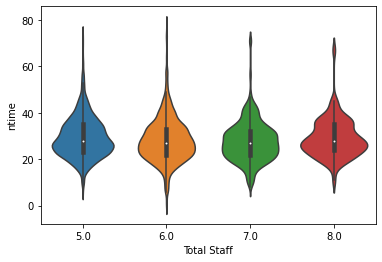

In [68]:
sns.violinplot(x='Total Staff',y='ntime',data=dfmerge1)

Text(0, 0.5, 'ntime')

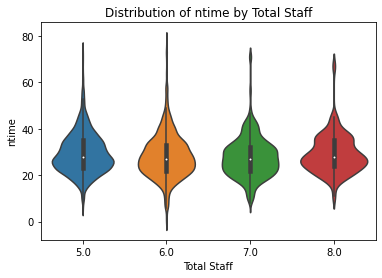

In [69]:
sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1)
plt.title('Distribution of ntime by Total Staff')
plt.xlabel('Total Staff')
plt.ylabel('ntime')


Text(0.9, 29.239257444402565, 'Mean = 28.74')

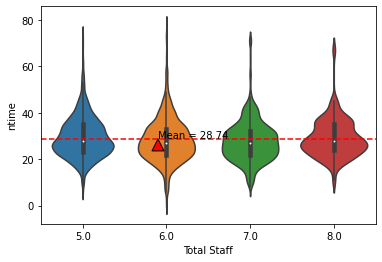

In [70]:
sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1)

# Add a vertical line at the mean of the ntime variable
mean = dfmerge1['ntime'].mean()
plt.axhline(mean, color='red', linestyle='--')

# Annotate the plot with the mean value
plt.annotate(f'Mean = {mean:.2f}', xy=(0.9, mean), xytext=(0.9, mean + 0.5),
            arrowprops=dict(facecolor='red', shrink=0.05)) 


<AxesSubplot:xlabel='Total Staff', ylabel='ntime'>

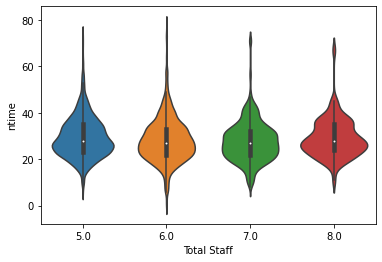

In [71]:
sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, jitter=True)

<AxesSubplot:xlabel='Total Staff', ylabel='ntime'>

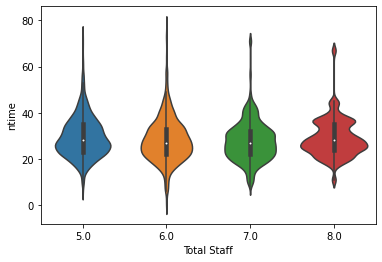

In [72]:
sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, bw=0.2)





<AxesSubplot:xlabel='Total Staff', ylabel='ntime'>

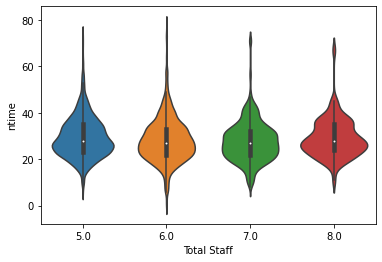

In [73]:
sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, 
               showmeans=True, showmedians=True, showextrema=True, quantiles=[0.25, 0.75])


<AxesSubplot:xlabel='Total Staff', ylabel='ntime'>

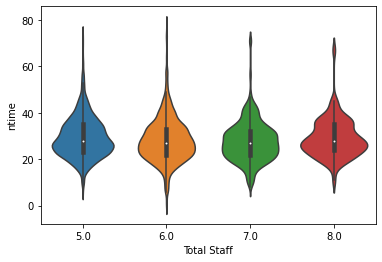

In [74]:
sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, 
               showmeans=True, showmedians=True, showextrema=True, 
               quantiles=[0.25, 0.5, 0.75])


In [76]:
#  version of seaborn that is installed:
sns.__version__

'0.12.2'

AttributeError: 'Series' object has no attribute 'columns'

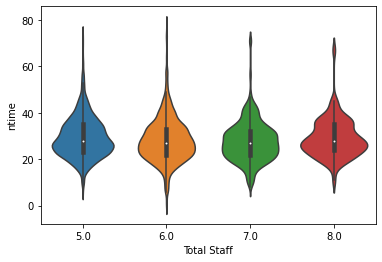

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to add labels to each violin plot
def add_labels(ax, data):
    positions = np.arange(len(data.columns))
    for i, col in enumerate(data.columns):
        vals = data[col]
        ax.text(positions[i], np.min(vals), f'Min = {np.min(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.median(vals), f'Median = {np.median(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.max(vals), f'Max = {np.max(vals):.2f}', ha='center', fontsize=8)

# Create the violin plot
ax = sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, 
                    showmeans=True, showmedians=True, showextrema=True)

# Add labels to the plot
add_labels(ax, dfmerge1.groupby('Total Staff')['ntime'].apply(list).apply(np.array))

# Show the plot
plt.show()


ValueError: operands could not be broadcast together with shapes (4533,) (4092,) 

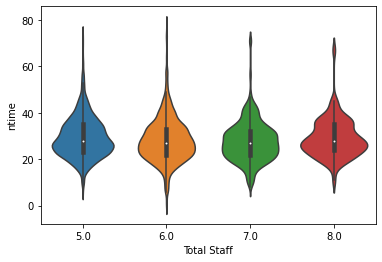

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to add labels to each violin plot
def add_labels(ax, data):
    positions = np.arange(len(data))
    if isinstance(data, pd.Series):
        data = [data]
    for i, vals in enumerate(data):
        ax.text(positions[i], np.min(vals), f'Min = {np.min(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.median(vals), f'Median = {np.median(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.max(vals), f'Max = {np.max(vals):.2f}', ha='center', fontsize=8)

# Create the violin plot
ax = sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, 
                    showmeans=True, showmedians=True, showextrema=True)

# Add labels to the plot
df_grouped = dfmerge1.groupby('Total Staff')['ntime'].apply(list).apply(np.array)
add_labels(ax, df_grouped)

# Show the plot
plt.show()


In [80]:
#  every column in data frame with null values:
dfmerge1.isnull().sum()

flightNumber            0
Flight_date             0
trip_number             0
container_no            0
Pick_up_Time            0
drop_off_Time        2974
Pick_up_Time_New        0
drop_off_Time_New    2974
Total Staff             0
ET                      0
ttime                   0
ntime                   0
dtype: int64

In [81]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
df = pd.read_csv('data.csv')

# Group data by 'Total Staff' column
df_grouped = df.groupby('Total Staff')['ntime'].apply(list)

# Create the violin plot
ax = sns.violinplot(x=df['Total Staff'], y=df['ntime'], 
                    order=df_grouped.index, 
                    showmeans=True, showmedians=True, showextrema=True)

# Add text labels for minimum, median, and maximum values
for i, col in enumerate(df_grouped.index):
    vals = df_grouped.loc[col]
    ax.text(i, np.min(vals), f'Min = {np.min(vals):.2f}', ha='center', fontsize=8)
    ax.text(i, np.median(vals), f'Median = {np.median(vals):.2f}', ha='center', fontsize=8)
    ax.text(i, np.max(vals), f'Max = {np.max(vals):.2f}', ha='center', fontsize=8)

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to add labels to each violin plot
# Define a function to add labels to each violin plot
def add_labels(ax, data):
    data = data.to_frame()
    positions = np.arange(len(data.columns))
    for i, col in enumerate(data.columns):
        vals = data[col]
        ax.text(positions[i], np.min(vals), f'Min = {np.min(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.median(vals), f'Median = {np.median(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.max(vals), f'Max = {np.max(vals):.2f}', ha='center', fontsize=8)




ValueError: operands could not be broadcast together with shapes (4533,) (4092,) 

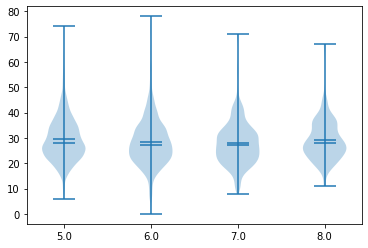

In [86]:
# Create the violin plot
fig, ax = plt.subplots()
data = dfmerge1.groupby('Total Staff')['ntime'].apply(list).apply(np.array)
parts = ax.violinplot(data, showmeans=True, showmedians=True, showextrema=True)
ax.set_xticks(np.arange(len(data))+1)
ax.set_xticklabels(data.index)

# Add labels to the plot
add_labels(ax, data)

# Show the plot
plt.show()


In [87]:
dfmerge1['Total Staff'].shape

(10612,)

In [88]:
dfmerge1['ntime'].shape

(10612,)

In [93]:
def add_labels(ax, data):
    positions = np.arange(len(data))
    ax.set_xticks(positions)
    ax.set_xticklabels(data.index)
    for i, val in enumerate(data):
        ax.text(positions[i], np.min(val), f'Min = {np.min(val):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.median(val), f'Median = {np.median(val):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.max(val), f'Max = {np.max(val):.2f}', ha='center', fontsize=8)


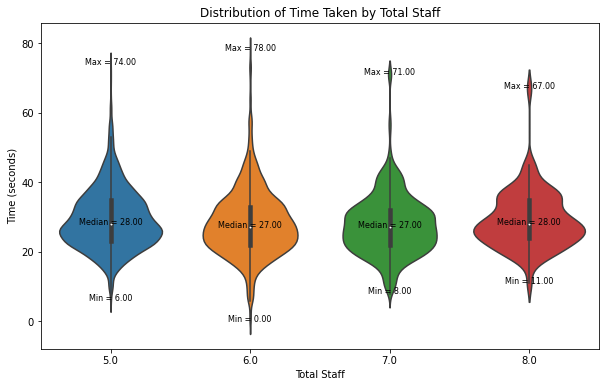

In [95]:
plt.figure(figsize=(10, 6))
# Create the violin plot
ax = sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, 
                    showmeans=True, showmedians=True, showextrema=True)

# Add labels to the plot
add_labels(ax, dfmerge1.groupby('Total Staff')['ntime'].apply(list).apply(np.array))
ax.set_xlabel('Total Staff')
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
plt.title('Distribution of Time Taken by Total Staff')

# Show the plot
plt.show()
# Show the plot
plt.show()


AttributeError: 'Series' object has no attribute 'columns'

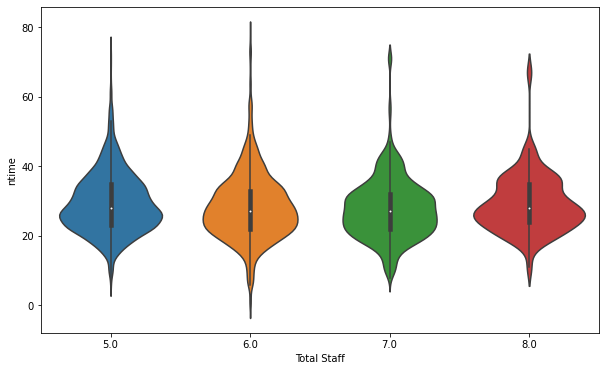

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a function to add labels to each violin plot
def add_labels(ax, data):
    positions = np.arange(len(data))
    for i, col in enumerate(data.columns):
        vals = data[col]
        ax.text(positions[i], np.min(vals), f'Min = {np.min(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.median(vals), f'Median = {np.median(vals):.2f}', ha='center', fontsize=8)
        ax.text(positions[i], np.max(vals), f'Max = {np.max(vals):.2f}', ha='center', fontsize=8)

# Create the violin plot
ax = sns.violinplot(x='Total Staff', y='ntime', data=dfmerge1, 
                    showmeans=True, showmedians=True, showextrema=True)

# Add labels to the plot
add_labels(ax, dfmerge1.groupby('Total Staff')['ntime'].apply(list).apply(np.array))

# Set the x-axis and y-axis labels
ax.set_xlabel('Total Staff')
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
plt.title('Distribution of Time Taken by Total Staff')

# Show the plot
plt.show()
#  positions = np.arange(len(data))
    # ax.set_xticks(positions)
    # ax.set_xticklabels(data.index)
    # for i, val in enumerate(data):


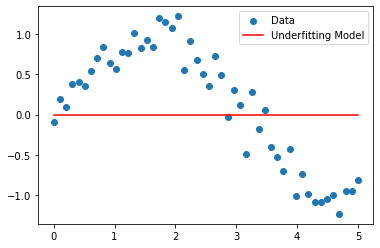

In [263]:
#  drwaw an underfitting graph with training accuracy and validation accuracy:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
x = np.linspace(0, 5, 50)
y = np.sin(x) + np.random.normal(scale=0.2, size=50)

# Define a simple linear model with only one feature
def linear_model(x, w0, w1):
    return w0 + w1 * x

# Fit the model to the data (underfitting)
w0, w1 = 0, 0
y_pred = linear_model(x, w0, w1)

# Plot the data and the model
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, label='Underfitting Model', color='red')
plt.legend()
plt.show()



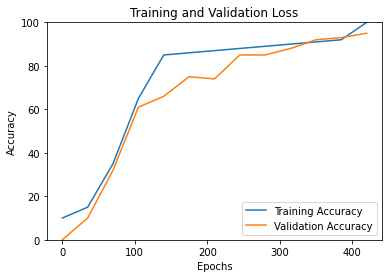

In [299]:
import matplotlib.pyplot as plt

# example training and validation loss data
# train_loss = [80, 80, 60, 50, 20, 21, 30, 25, 20, 15, 10, 5, 0]
train_loss=[10,15,35,65,85,86,87,88,89,90,91,92,100]
val_loss = [0, 10, 32, 61,66, 75,74, 85, 85, 88, 92, 93, 95]
# reverse the lists to plot the loss values in the correct order:
# train_loss.reverse()
# val_loss.reverse()

# create x-axis values for the plot (epochs)
# epochs = [i for i in range(20, len(train_loss) + 40)]
epochs= [0,  35,  70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420]
       

# plot the training and validation loss
plt.plot(epochs, train_loss, label='Training Accuracy')
plt.plot(epochs, val_loss, label='Validation Accuracy')

# add labels and legend to the plot
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 100])  # set y-axis limits to 0-1.0
plt.title('Training and Validation Loss')
plt.legend()

# display the plot
plt.show()


In [285]:
# 15 equal parts of 450:
np.linspace(0, 420, 13)


array([  0.,  35.,  70., 105., 140., 175., 210., 245., 280., 315., 350.,
       385., 420.])

In [282]:
400/13


30.76923076923077

In [281]:
epochs

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67]

ValueError: x and y must have same first dimension, but have shapes (59,) and (10,)

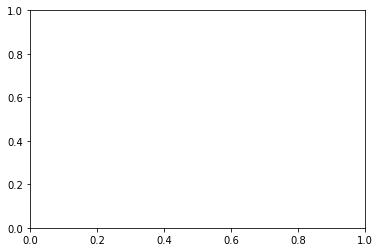

In [269]:
import matplotlib.pyplot as plt

# example data for training and validation loss
train_loss = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
val_loss = [ 1.0, 0.9, 0.8, 0.7, 0.6, 0.5]

# create x-axis values for the plot (epochs)
epochs = list(range(1, len(train_loss) + 50))

# plot the training and validation loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

# add labels and legend to the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 4.5])  # adjust y-axis limits to fit the data
plt.title('Training and Validation Loss')
plt.legend()

# display the plot
plt.show()